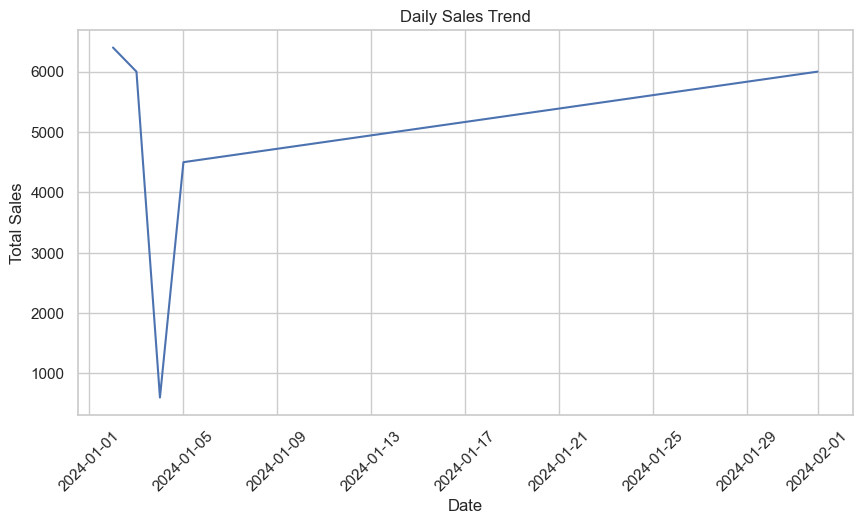

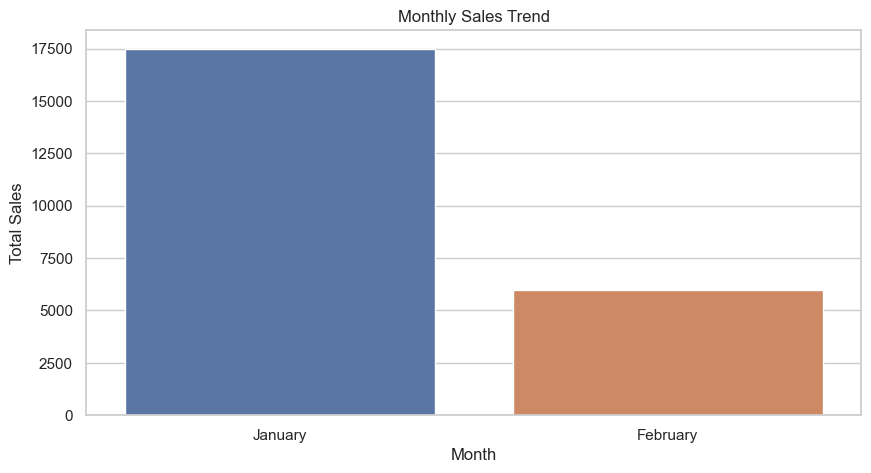

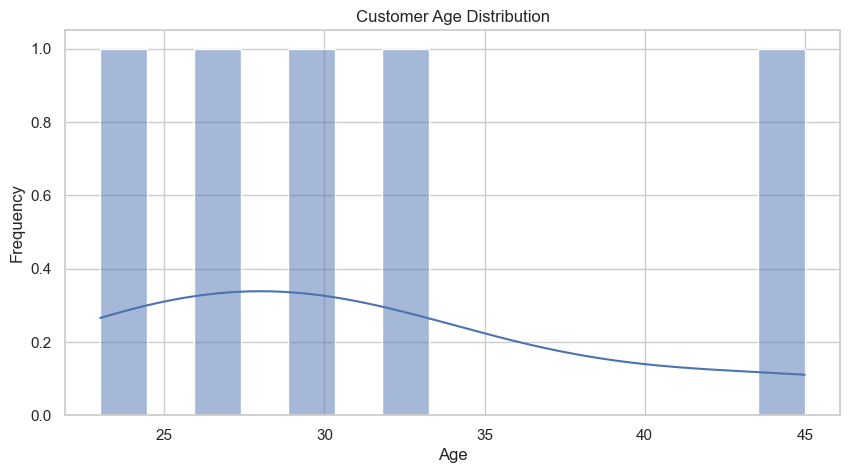

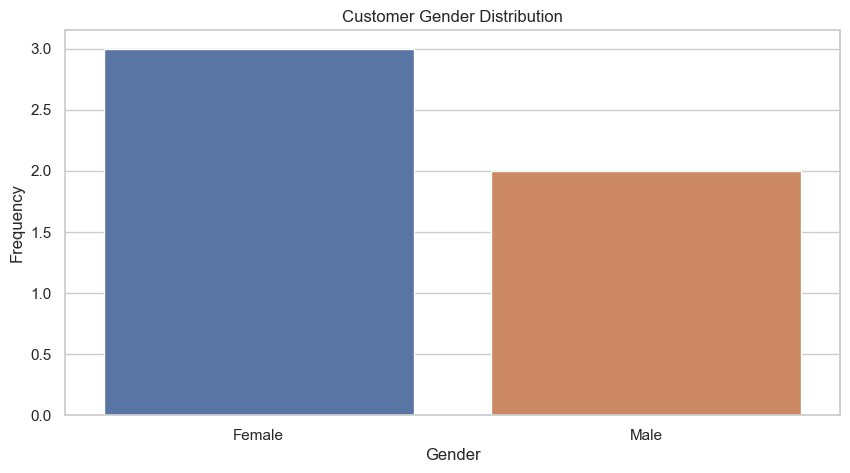

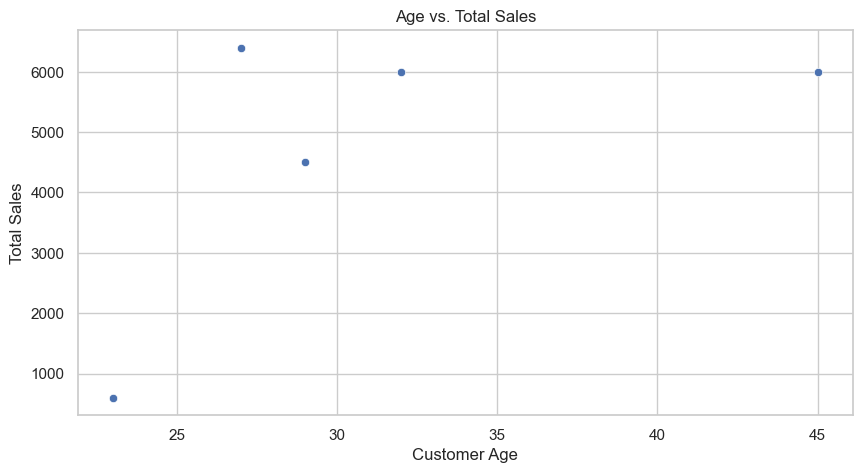

{'total_sales': 23500,
 'average_sales_per_day': 4700.0,
 'average_sales_per_customer': 4700.0,
 'top_products': {'Galaxy X20': 6400,
  'UltraBook Pro': 6000,
  'iPad Air': 6000,
  'Gaming Beast': 4500,
  'Wireless Mouse': 600},
 'top_categories': {'Laptop': 10500,
  'Smartphone': 6400,
  'Tablet': 6000,
  'Accessories': 600},
 'daily_sales_head': {Timestamp('2024-01-02 00:00:00'): 6400,
  Timestamp('2024-01-03 00:00:00'): 6000,
  Timestamp('2024-01-04 00:00:00'): 600,
  Timestamp('2024-01-05 00:00:00'): 4500,
  Timestamp('2024-02-01 00:00:00'): 6000},
 'monthly_sales': {Timestamp('2024-01-31 00:00:00'): 17500,
  Timestamp('2024-02-29 00:00:00'): 6000},
 'age_distribution_head': {23: 1, 27: 1, 29: 1, 32: 1, 45: 1},
 'gender_distribution': {'Female': 3, 'Male': 2},
 'age_sales_relationship_head': {23: 600,
  27: 6400,
  29: 4500,
  32: 6000,
  45: 6000}}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Book1.xlsx')

# Sales Summary
total_sales = df['Total Sales'].sum()
average_sales_per_day = df.groupby('Date')['Total Sales'].sum().mean()
average_sales_per_customer = df['Total Sales'].sum() / df['Customer Age'].count()

# Product Performance
top_products = df.groupby('Product Name')['Total Sales'].sum().sort_values(ascending=False).head(5)
top_categories = df.groupby('Product Category')['Total Sales'].sum().sort_values(ascending=False)

# Sales Trends
daily_sales = df.groupby('Date')['Total Sales'].sum()
monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Total Sales'].sum()

# Customer Insights
age_distribution = df['Customer Age'].value_counts().sort_index()
gender_distribution = df['Customer Gender'].value_counts()
age_sales_relationship = df.groupby('Customer Age')['Total Sales'].sum()

# Plotting
sns.set(style='whitegrid')

# Daily Sales Trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=daily_sales.index, y=daily_sales.values)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Monthly Sales Trend
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_sales.index.strftime('%B'), y=monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Customer Age'], bins=15, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Customer Gender', data=df)
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

# Age vs. Sales
plt.figure(figsize=(10, 5))
sns.scatterplot(x=age_sales_relationship.index, y=age_sales_relationship.values)
plt.title('Age vs. Total Sales')
plt.xlabel('Customer Age')
plt.ylabel('Total Sales')
plt.show()

# Printing analysis results
analysis_results = {
    "total_sales": total_sales,
    "average_sales_per_day": average_sales_per_day,
    "average_sales_per_customer": average_sales_per_customer,
    "top_products": top_products.to_dict(),
    "top_categories": top_categories.to_dict(),
    "daily_sales_head": daily_sales.head().to_dict(),
    "monthly_sales": monthly_sales.to_dict(),
    "age_distribution_head": age_distribution.head().to_dict(),
    "gender_distribution": gender_distribution.to_dict(),
    "age_sales_relationship_head": age_sales_relationship.head().to_dict()
}

analysis_results